<a href="https://colab.research.google.com/github/IvanRavarotto/ModelosNoSupervisados/blob/main/ModelosNoSupervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis y Predicción de Enfermedades Cardiovasculares mediante Agrupación No Supervisada (K-Means y Jerárquico)

##Carga de librerias necesarias para el proyecto

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

from tabulate import tabulate
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

##Carga del dataset

In [18]:
# Carga del dataset desde el repositorio de github
df = pd.read_csv('https://raw.githubusercontent.com/IvanRavarotto/ModelosNoSupervisados/refs/heads/main/Cardiovascular_Disease_Dataset.csv')

## Formulario de carga de datos del nuevo paciente

In [47]:
# Formulario del usuario
Edad = 27    # @param {type:"slider", min:18, max:90, step:1}
Genero = "Femenino"       # @param ["Masculino", "Femenino"]
DolorPecho = "1"          # @param ["0", "1", "2", "3"]
PresionArterial = 174     # @param {type:"slider", min:50, max:250, step:1}
Clesterol = 321           # @param {type:"slider", min:0, max:700, step:1}
Glucemia = "1"            # @param ["0", "1"]
Electrocardiograma = "1"  # @param ["0", "1", "2", "3"]
FrecuenciaCardiacaMaxima = 112  # @param {type:"slider", min:60, max:250, step:1}
AnginaDePecho = "1"       # @param ["0", "1"]
Depresion = 1.3           # @param {type:"slider", min:0.1, max:7, step:0.1}
Pendiente = "1"           # @param ["0", "1", "2", "3"]
VasosCAfectados = "1"     # @param ["0", "1", "2", "3"]

# Conversión de variables categóricas
Genero = 1 if Genero == "Masculino" else 0

# Construcción del DataFrame del usuario
datos_usuario = pd.DataFrame([{
    'age': Edad,
    'gender': Genero,
    'chestpain': int(DolorPecho),
    'restingBP': PresionArterial,
    'serumcholestrol': Clesterol,
    'fastingbloodsugar': int(Glucemia),
    'restingrelectro': int(Electrocardiograma),
    'maxheartrate': FrecuenciaCardiacaMaxima,
    'exerciseangia': int(AnginaDePecho),
    'oldpeak': Depresion,
    'slope': int(Pendiente),
    'noofmajorvessels': int(VasosCAfectados),
}])

## Separación y escalado de los datos para su posterior tratamiento.

### Importación de librerias necesarias para separar en datos de entrenamiento, prueba, y escalado.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### División de los datos y escalado

In [20]:
# Dividimos el dataset
Y = df['target'] # Variable objetivo
X = df.drop(columns=['target', 'patientid']) # Variables independientes para entrenar los modelos

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Columnas booleanas que NO deben escalarse
columnas_booleanas = ['gender', 'fastingbloodsugar', 'exerciseangina']
columnas_numericas = [col for col in X_train.columns if col not in columnas_booleanas]

# Escalador
scaler = StandardScaler()

# Escalamos solo las columnas numéricas, manteniendo las booleanas iguales
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train[columnas_numericas])
X_test_scaled[columnas_numericas] = scaler.transform(X_test[columnas_numericas])

#Rasignamos para mantener sus nombres originales
X_train = X_train_scaled
X_test = X_test_scaled


## KMeans (No Supervisado - Clustering)
Su función principal es dividir un conjunto de n observaciones en k grupos (o clústeres), donde cada observación pertenece al clúster cuyo centroide (media) es el más cercano.

* Inicialización: Se eligen k puntos aleatorios del conjunto de datos como centroides iniciales para cada uno de los k clústeres.
* Asignación: Cada punto de datos se asigna al clúster cuyo centroide es el más cercano (medido por distancia euclidiana, por ejemplo).
* Actualización: Una vez que todos los puntos han sido asignados, los centroides de cada clúster se recalculan como la media de todos los puntos de datos asignados a ese clúster.
* Iteración: Los pasos de asignación y actualización se repiten iterativamente hasta que los centroides ya no cambian significativamente o se alcanza un número máximo de iteraciones.

In [39]:
# Importamos la clase KMeans desde scikit-learn
from sklearn.cluster import KMeans

# Comienza a captar el tiempo en que comienza el entranmiento
start_time = time.time()

# Se crea una instancia donde se pide buscar 2 clusters, con una semilla para reproducir el resultado varias veces.
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
#Entrenamiento del modelo
kmeans.fit(X_train)

# Termina de captar el tiempo de entrenamiento, dando por finalizado el mismo
end_time = time.time()
# Calcula el tiempo restando el tiempo de inicio al de final.
training_timeK = end_time - start_time

# Imprime un mensaje dando aviso cuanto tiempo tardo en total en entrenarse en segundos.
print(f"Tiempo de entrenamiento de K-Means: {training_timeK:.4f} segundos")

Tiempo de entrenamiento de K-Means: 0.0082 segundos


Tiempo de predicción de K-Means: 0.0062 segundos 



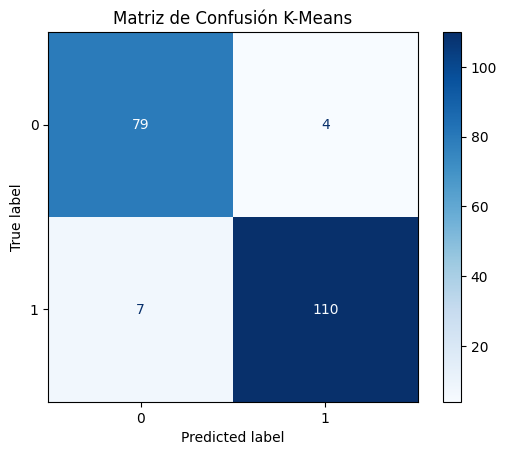


Porcentaje de Precisión de K-Means: 94.57%


In [43]:
# Predecir las etiquetas de los clústeres para los datos de prueba escalados
# Nueva instancia para medir el tiempo en que tarda.
start_time = time.time()

# Utilizando el modelo ya entrenado probamos los datos de prueba, para predecir el resultado deseado.
predicted_labels_kmeans = kmeans.predict(X_test)

end_time = time.time()
prediction_time_kmeans = end_time - start_time # Tiempo final que tarda en probar/predecir

print(f"Tiempo de predicción de K-Means: {prediction_time_kmeans:.4f} segundos \n")

#
cluster_mapping_kmeans = {}
for i in np.unique(predicted_labels_kmeans):
    # Obtener las etiquetas verdaderas para todos los puntos de datos asignados al clúster i
    labels_in_cluster = Y_test[predicted_labels_kmeans == i]
    # Encontrar la etiqueta verdadera más frecuente en este clúster
    if not labels_in_cluster.empty:
        most_frequent_label = labels_in_cluster.mode()[0]
        cluster_mapping_kmeans[i] = most_frequent_label
    else:
        # Manejar el caso en que un clúster podría estar vacío (poco probable con n_clusters=2)
        cluster_mapping_kmeans[i] = 0 # Valor por defecto 0 o manejar según sea necesario

mapped_predicted_labels = np.array([cluster_mapping_kmeans[label] for label in predicted_labels_kmeans])
cm_kmeans = confusion_matrix(Y_test, mapped_predicted_labels)

# Matriz de confusión KMeans impresa
display = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans, display_labels=np.unique(Y_test))
display.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión K-Means')
plt.show()

report_kmeans = classification_report(Y_test, mapped_predicted_labels, output_dict=True)
precision_kmeans = report_kmeans['weighted avg']['precision'] * 100

print(f"\nPorcentaje de Precisión de K-Means: {precision_kmeans:.2f}%")

### Reducción a 2 dimenciones mediante PCA <br>
PCA es una técnica de reducción de dimensionalidad. Su objetivo principal es transformar un conjunto de variables posiblemente correlacionadas en un conjunto de un número menor de variables no correlacionadas llamadas componentes principales.
* Esto permite visualizar los clústeres y los centroides en un gráfico de dispersión 2D, lo cual sería imposible con la dimensionalidad original de los datos.

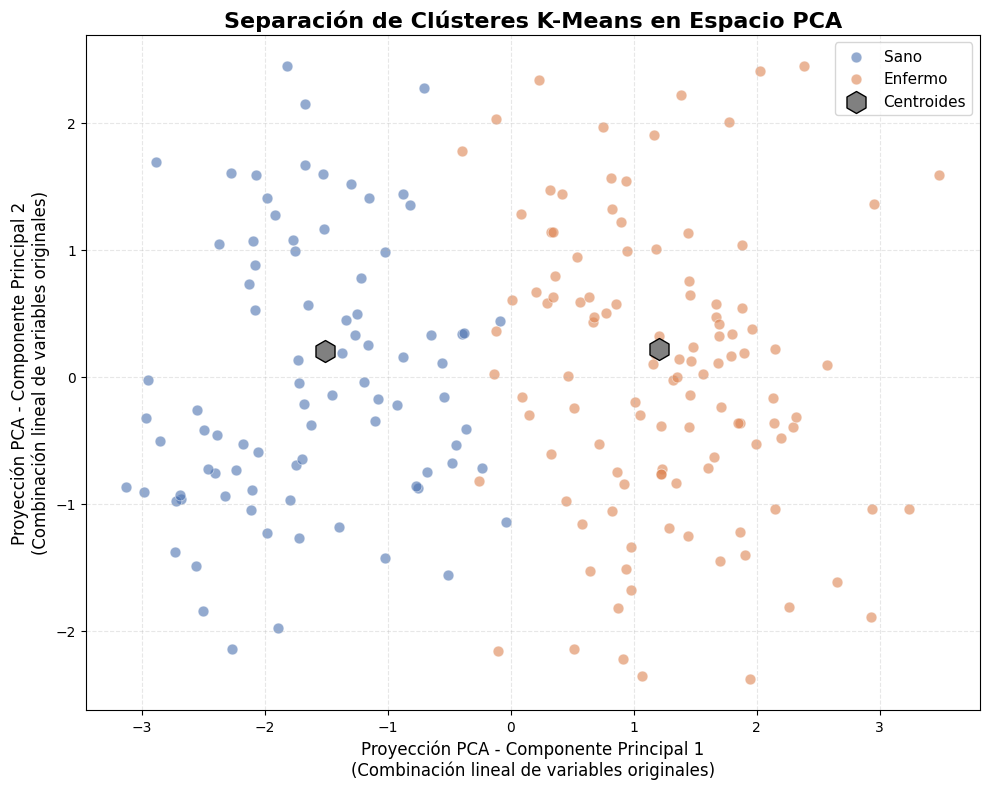

In [45]:
#Importación de la clase PCA desde scikit-learn
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
# Convertir X_test a un array NumPy antes de fit_transform
X_test_pca = pca.fit_transform(X_test.values)

# Transformar los centroides al espacio PCA
centros_pca = pca.transform(kmeans.cluster_centers_)

# Crear gráfico de dispersión refinado
plt.figure(figsize=(10, 8))

# Grupo 0
plt.scatter(X_test_pca[predicted_labels_kmeans == 0, 0], X_test_pca[predicted_labels_kmeans == 0, 1],
            s=60, c='#4C72B0', label='Sano', alpha=0.6, edgecolors='white', linewidths=0.5)

# Grupo 1
plt.scatter(X_test_pca[predicted_labels_kmeans == 1, 0], X_test_pca[predicted_labels_kmeans == 1, 1],
            s=60, c='#DD8452', label='Enfermo', alpha=0.6, edgecolors='white', linewidths=0.5)

# Centroides como hexágonos grises
plt.scatter(centros_pca[:, 0], centros_pca[:, 1],
            s=250, c='gray', marker='h', edgecolor='black', label='Centroides')

# Estética y detalles
plt.title('Separación de Clústeres K-Means en Espacio PCA', fontsize=16, fontweight='bold')
plt.xlabel('Proyección PCA - Componente Principal 1\n(Combinación lineal de variables originales)', fontsize=12)
plt.ylabel('Proyección PCA - Componente Principal 2\n(Combinación lineal de variables originales)', fontsize=12)
plt.legend(frameon=True, fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

###Tratamiento y proyección en base a los datos del paciente nuevo cargado

In [57]:
# Validación institucional de columnas
assert list(datos_usuario.columns) == list(X_train.columns), \
    "Las columnas del usuario no coinciden con las del dataset"

# Validación de tipos numéricos
assert datos_usuario.dtypes.apply(lambda x: np.issubdtype(x, np.number)).all(), \
    "El DataFrame del usuario contiene columnas no numéricas"

# Transformación del dato del usuario con el escalador ya entrenado
datos_usuario_escalado = datos_usuario.copy()
datos_usuario_escalado[columnas_numericas] = scaler.transform(datos_usuario[columnas_numericas])


# Predicción del grupo del usuario con el modelo ya entrenado
grupo_usuario = kmeans.predict(datos_usuario_escalado)

# Interpretación del resultado
# Usamos el mapeo de clúster a etiqueta verdadera para una interpretación más clara
etiqueta_interpretada = cluster_mapping_kmeans[grupo_usuario[0]]

if etiqueta_interpretada == 1:
    print(f"El usuario fue clasificado como 'Enfermo'.")
else:
    print(f"El usuario fue clasificado como 'Sano'.")

El usuario fue clasificado como 'Sano'.


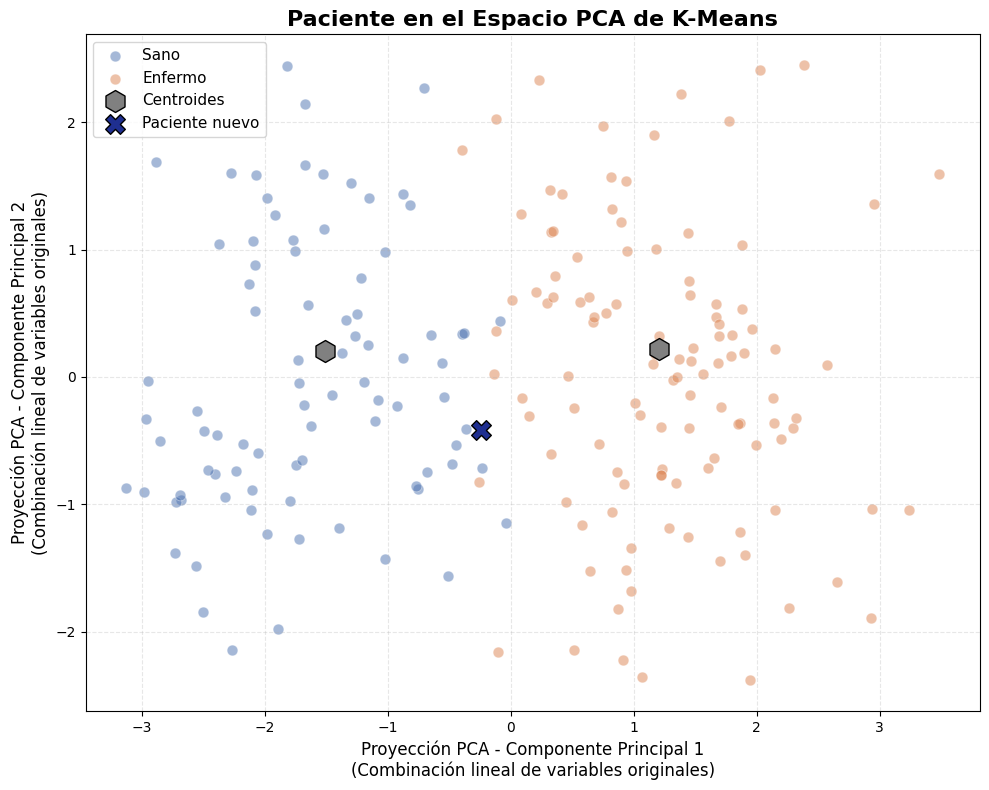

In [50]:
# Proyectar el paciente en el espacio PCA
usuario_pca = pca.transform(datos_usuario_escalado.values)

# Crear gráfico
plt.figure(figsize=(10, 8))

# Grupo 0
plt.scatter(X_test_pca[predicted_labels_kmeans == 0, 0], X_test_pca[predicted_labels_kmeans == 0, 1],
            s=60, c='#4C72B0', label='Sano', alpha=0.5, edgecolors='white', linewidths=0.5)

# Grupo 1
plt.scatter(X_test_pca[predicted_labels_kmeans == 1, 0], X_test_pca[predicted_labels_kmeans == 1, 1],
            s=60, c='#DD8452', label='Enfermo', alpha=0.5, edgecolors='white', linewidths=0.5)

# Centroides
plt.scatter(centros_pca[:, 0], centros_pca[:, 1],
            s=250, c='gray', marker='h', edgecolor='black', label='Centroides')

# Paciente nuevo (color más intenso según grupo asignado)
color_usuario = '#1f2f90' if grupo_usuario[0] == 0 else '#b03c00'
plt.scatter(usuario_pca[0, 0], usuario_pca[0, 1],
            s=200, c=color_usuario, marker='X', edgecolor='black', label='Paciente nuevo')

# Estética
plt.title('Paciente en el Espacio PCA de K-Means', fontsize=16, fontweight='bold')
plt.xlabel('Proyección PCA - Componente Principal 1\n(Combinación lineal de variables originales)', fontsize=12)
plt.ylabel('Proyección PCA - Componente Principal 2\n(Combinación lineal de variables originales)', fontsize=12)
plt.legend(frameon=True, fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#Cluster Hierarchical (No Supervisado - Clustering)
A diferencia de K-Means que forma clústeres planos, la agrupación jerárquica construye una jerarquía de clústeres, que puede visualizarse con un dendrograma. Existen dos tipos principales:
1. Agrupación Aglomerativa (bottom-up): Es el tipo más común y el que se usa en tu notebook (AgglomerativeClustering). Funciona de la siguiente manera:
  * Paso 1: Cada punto de datos comienza como su propio clúster.
  * Paso 2: Los dos clústeres más cercanos (más similares) se combinan para formar un nuevo clúster.
  * Paso 3: Este proceso se repite hasta que todos los puntos de datos pertenecen a un solo clúster grande (la raíz de la jerarquía).

2. Agrupación Divisiva (top-down): Comienza con todos los puntos en un solo clúster y luego lo divide recursivamente en clústeres más pequeños hasta que cada punto es un clúster individual.

Características clave de la Agrupación Aglomerativa:

* Enlace (Linkage): Necesita una métrica para determinar la 'cercanía' o 'distancia' entre clústeres. Las más comunes son:
  * ward: Minimiza la varianza dentro de los clústeres que se fusionan (usado en tu dendrograma).
  * average: Usa la distancia promedio entre los puntos de cada clúster.
  * complete: Usa la máxima distancia entre los puntos de cada clúster.
  * single: Usa la mínima distancia entre los puntos de cada clúster.

In [26]:
from sklearn.cluster import AgglomerativeClustering

# Registra el tiempo de inicio
start_time_hierarchical = time.time()

# Instanciar el modelo AgglomerativeClustering
# n_clusters=2 ya que estamos comparando con un objetivo de clasificación binaria
hierarchical_model = AgglomerativeClustering(n_clusters=2)

# Ajustar el modelo AgglomerativeClustering a los datos de entrenamiento escalados
start_time = time.time()
hierarchical_model.fit(X_train)
end_time = time.time()

prediction_time_cluster = end_time - start_time

# Registra el tiempo de finalización y calcula el tiempo de entrenamiento
end_time_hierarchical = time.time()
training_time_hierarchical = end_time_hierarchical - start_time_hierarchical

print(f"Tiempo de entrenamiento de Agrupación Jerárquica: {training_time_hierarchical:.4f} segundos")

# Predecir las etiquetas de los clústeres para los datos de prueba escalados
predicted_labels_hierarchical = hierarchical_model.fit_predict(X_test)
print("Agrupación Jerárquica aplicada y predicciones realizadas en los datos de prueba.")

Tiempo de entrenamiento de Agrupación Jerárquica: 0.0308 segundos
Agrupación Jerárquica aplicada y predicciones realizadas en los datos de prueba.


In [27]:
cluster_mapping_hierarchical = {}
for i in np.unique(predicted_labels_hierarchical):
    # Obtener las etiquetas verdaderas para todos los puntos de datos asignados al clúster i
    labels_in_cluster = Y_test[predicted_labels_hierarchical == i]
    # Encontrar la etiqueta verdadera más frecuente en este clúster
    if not labels_in_cluster.empty:
        most_frequent_label = labels_in_cluster.mode()[0]
        cluster_mapping_hierarchical[i] = most_frequent_label
    else:
        # Manejar el caso en que un clúster podría estar vacío
        cluster_mapping_hierarchical[i] = 0 # Valor por defecto 0 o manejar según sea necesario

mapped_predicted_labels_hierarchical = np.array([cluster_mapping_hierarchical[label] for label in predicted_labels_hierarchical])

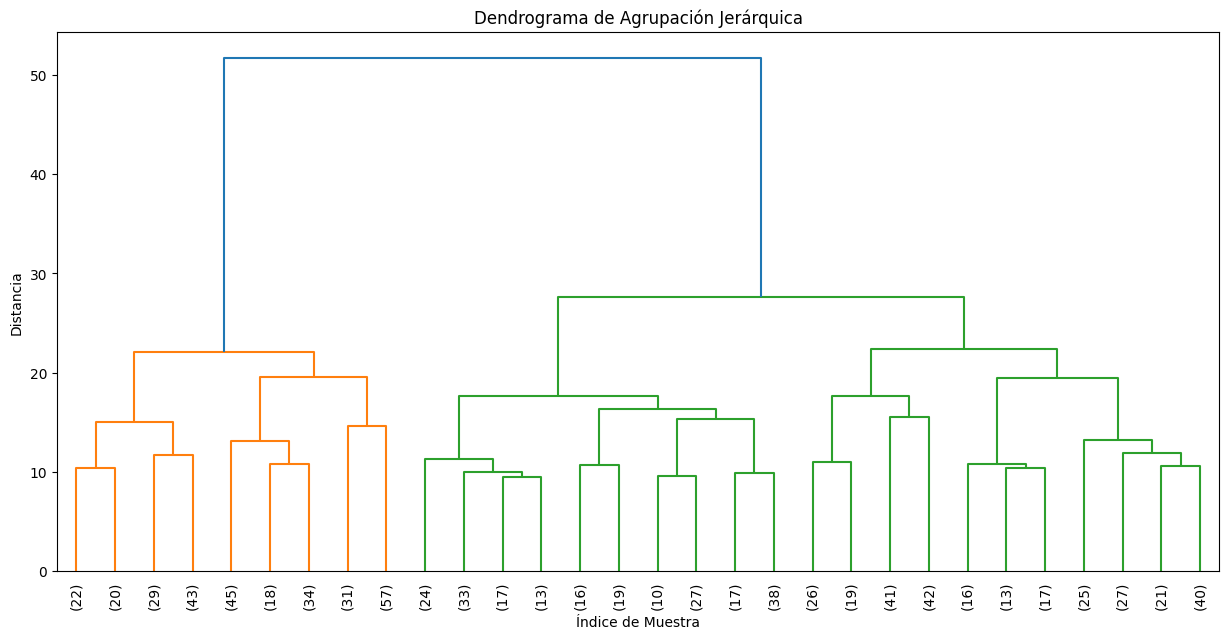

In [28]:
# Calcular la matriz de enlace para X_train
# 'ward' minimiza la varianza dentro de cada clúster.
Z = linkage(X_train, method='ward')

# Trazar el dendrograma
plt.figure(figsize=(15, 7))
plt.title('Dendrograma de Agrupación Jerárquica')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.show()



Matriz de Confusión para la Agrupación Jerárquica:


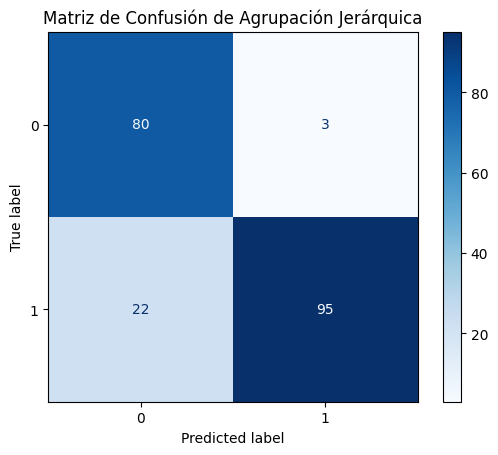

Porcentaje de Precisión de Agrupación Jerárquica: 89.26%


In [29]:
cm_hierarchical = confusion_matrix(Y_test, mapped_predicted_labels_hierarchical)
print("Matriz de Confusión para la Agrupación Jerárquica:")
display_hierarchical = ConfusionMatrixDisplay(confusion_matrix=cm_hierarchical, display_labels=np.unique(Y_test))
display_hierarchical.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión de Agrupación Jerárquica')
plt.show()

report_hierarchical = classification_report(Y_test, mapped_predicted_labels_hierarchical, output_dict=True)
precision_hierarchical = report_hierarchical['weighted avg']['precision'] * 100

print(f"Porcentaje de Precisión de Agrupación Jerárquica: {precision_hierarchical:.2f}%")

In [30]:
# Formulario del usuario
Edad = 49    # @param {type:"slider", min:18, max:90, step:1}
Genero = "Femenino"       # @param ["Masculino", "Femenino"]
DolorPecho = "1"          # @param ["0", "1", "2", "3"]
PresionArterial = 101     # @param {type:"slider", min:50, max:250, step:1}
Clesterol = 227           # @param {type:"slider", min:0, max:700, step:1}
Glucemia = "1"            # @param ["0", "1"]
Electrocardiograma = "2"  # @param ["0", "1", "2", "3"]
FrecuenciaCardiacaMaxima = 112  # @param {type:"slider", min:60, max:250, step:1}
AnginaDePecho = "1"       # @param ["0", "1"]
Depresion = 1.3           # @param {type:"slider", min:0.1, max:7, step:0.1}
Pendiente = "3"           # @param ["0", "1", "2", "3"]
VasosCAfectados = "1"     # @param ["0", "1", "2", "3"]

# Conversión de variables categóricas
Genero = 1 if Genero == "Masculino" else 0

# Construcción del DataFrame del usuario
datos_usuario = pd.DataFrame([{
    'age': Edad,
    'gender': Genero,
    'chestpain': int(DolorPecho),
    'restingBP': PresionArterial,
    'serumcholestrol': Clesterol,
    'fastingbloodsugar': int(Glucemia),
    'restingrelectro': int(Electrocardiograma),
    'maxheartrate': FrecuenciaCardiacaMaxima,
    'exerciseangia': int(AnginaDePecho),
    'oldpeak': Depresion,
    'slope': int(Pendiente),
    'noofmajorvessels': int(VasosCAfectados),
}])

# Validación institucional de columnas
assert list(datos_usuario.columns) == list(X_train.columns), \
    "Las columnas del usuario no coinciden con las del dataset"

# Validación de tipos numéricos
assert datos_usuario.dtypes.apply(lambda x: np.issubdtype(x, np.number)).all(), \
    "El DataFrame del usuario contiene columnas no numéricas"

# Transformación del dato del usuario con el escalador ya entrenado
datos_usuario_escalado = datos_usuario.copy()
datos_usuario_escalado[columnas_numericas] = scaler.transform(datos_usuario[columnas_numericas])


# Predicción del grupo del usuario con el modelo ya entrenado
grupo_usuario = kmeans.predict(datos_usuario_escalado)

# Interpretación del resultado
if grupo_usuario[0] == 1:
    print("El usuario fue agrupado en el grupo 1. Tiene características similares a ese grupo.")
else:
    print("El usuario fue agrupado en el grupo 0. Tiene características similares a ese grupo.")

# Registro institucional del resultado
with open("log_clustering_usuario.txt", "a") as f:
    f.write(f"Edad: {Edad}, Grupo asignado: {grupo_usuario[0]}\n")

El usuario fue agrupado en el grupo 1. Tiene características similares a ese grupo.


In [31]:
# Crear tabla con las variables ya definidas
from IPython.display import display
display(df)
data = {
    "Modelo": ["K-means", "Hierarchical Clustering"],
    "Tiempo Entrenamiento (s)": [training_timeK, training_time_hierarchical],
    "Tiempo Prediccion (s)": [prediction_time_kmeans, prediction_time_cluster],
    "Precisión (%)": [precision_kmeans,  precision_hierarchical]
}


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


# Comparación de Rendimiento de Modelos

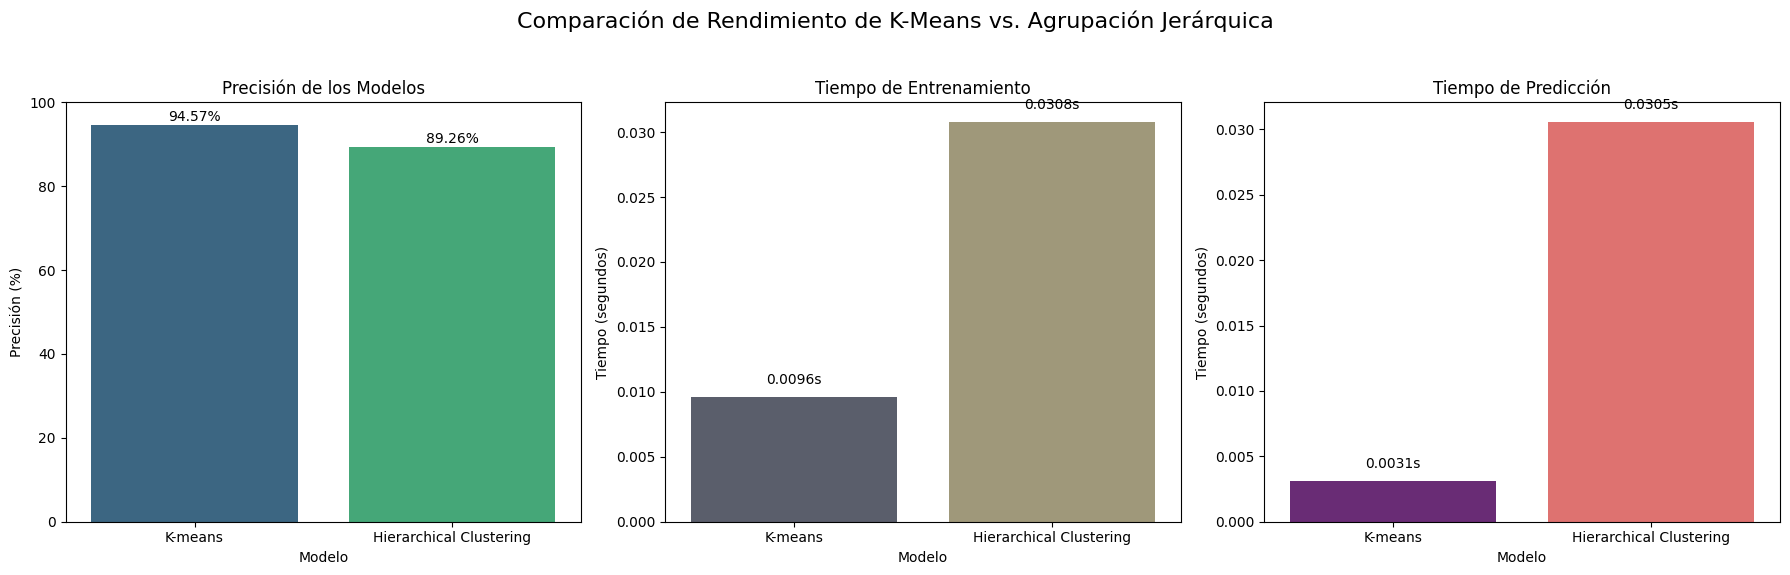

In [62]:
modelos_df = pd.DataFrame(data)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparación de Rendimiento de K-Means vs. Agrupación Jerárquica', fontsize=16)

# Gráfico de Precisión
sns.barplot(ax=axes[0], x='Modelo', y='Precisión (%)', data=modelos_df, palette='viridis', hue='Modelo', legend=False)
axes[0].set_title('Precisión de los Modelos')
axes[0].set_ylabel('Precisión (%)')
axes[0].set_ylim(0, 100) # Asegurar que el eje y vaya de 0 a 100
for index, row in modelos_df.iterrows():
    axes[0].text(row.name, row['Precisión (%)'] + 1, f'{row['Precisión (%)']:.2f}%', color='black', ha="center")

# Gráfico de Tiempo de Entrenamiento
sns.barplot(ax=axes[1], x='Modelo', y='Tiempo Entrenamiento (s)', data=modelos_df, palette='cividis', hue='Modelo', legend=False)
axes[1].set_title('Tiempo de Entrenamiento')
axes[1].set_ylabel('Tiempo (segundos)')
for index, row in modelos_df.iterrows():
    axes[1].text(row.name, row['Tiempo Entrenamiento (s)'] + 0.001, f'{row['Tiempo Entrenamiento (s)']:.4f}s', color='black', ha="center")

# Gráfico de Tiempo de Predicción
sns.barplot(ax=axes[2], x='Modelo', y='Tiempo Prediccion (s)', data=modelos_df, palette='magma', hue='Modelo', legend=False)
axes[2].set_title('Tiempo de Predicción')
axes[2].set_ylabel('Tiempo (segundos)')
for index, row in modelos_df.iterrows():
    axes[2].text(row.name, row['Tiempo Prediccion (s)'] + 0.001, f'{row['Tiempo Prediccion (s)']:.4f}s', color='black', ha="center")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#Conclusión

Comentarios Finales:

Para evitar el sesgo de datos y fomentar la imparcialidad de los modelos, decidimos que la manera mas efectiva de trabajar con modelos no supervisados es realizar el escalado de los datos del tipo ordinal, para luego, pasar a los modelos los datos escalados más los datos booleanos y así permitir a los modelos realizar el agrupamiento en dos grupos: Sanos y Enfermos.

Luego de verificar el comportamiento de los modelos, observamos que, el rendimiento de los mismos dependen, en parte, de la cantidad de columnas o variables que deban analizar.

Dado que el data set que nos encontramos trabajando posee varias columnas con síntomas y especificaciones a tener en cuenta para la predicción, el modelo que mejor se desempeña para realizar el diagnóstico del paciente es el K-Means.

Es importante mencionar que la predicción en el modelo K-Means es más sencilla, mientras que el clustering jerárquico, aunque más riguroso, tiende a ser un proceso más manual en su aplicación e interpretación.
